#1 - Notebook to download, clean and perform EDA on primary dataset






---


### **This notebook primarily contains code to download the primary dataset that is hosted on Kaggle, clean and perform exploratory data analysis on it.**


---



* *Link to the dataset:* https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

* *Author:* **Clement Bisaillon**
* We are using v1 of the dataset that was uploaded on 26th March 2020.



---
### **Some basic information regarding the dataset:**

* The data was originally collected by the University of Victoria ISOT Research Lab from real-world sources.

* The collection techniques and in-depth information about the dataset are available on [this link](https://www.uvic.ca/engineering/ece/isot/assets/docs/ISOT_Fake_News_Dataset_ReadMe.pdf), for those interested.

* Truthful articles were obtained by crawling articles from Reuters.com (News website)

* Fake news articles were collected from different sources, usually unreliable websites that were flagged by Politifact (a fact-checking organization in the U.S.) and Wikipedia.

* The dataset contains different types of articles on different topics, however, the majority of articles focus on political and world news topics, between 2015 - 2018.


---



### **Citations requested by dataset author:**

1. *Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018.*

2. *Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).*




For instructions on installing the Kaggle API and getting the API keyfile, please refer to [this link.](https://medium.com/unpackai/how-to-use-kaggle-datasets-in-google-colab-f9b2e4b5767c)


**Note: Without installing the Kaggle API and/or loading the API keyfile, you will not be able to download the dataset!**








In [ ]:
# Installs Kaggle API.
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing libraries and defining constants

In [ ]:
# Imports all the libraries required for the notebook to run.
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from re import search
from google.colab import drive

In [ ]:
# Mounts Google Drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Sets the path for Kaggle's configuration file as well as the data directory.
DATA_PATH = "/content/drive/MyDrive/Data/"
os.environ['KAGGLE_CONFIG_DIR'] = DATA_PATH

# Please update the below four constants if the original dataset on Kaggle changes.
DATA_ARCHIVE = 'fake-and-real-news-dataset.zip'
FAKE_DATA_FILE = 'Fake.csv'
TRUE_DATA_FILE = 'True.csv'
KAGGLE_DATA_LOCATION = 'clmentbisaillon/fake-and-real-news-dataset'

CLEAN_DATA_FILE_NAME = 'kaggle_newsdataset_cleaned.csv'
SAVE_FILE = True

# Downloading the dataset

In [ ]:
# Checks if the directory to store the dataset already exists and if not, create it.
try: 
    os.mkdir(DATA_PATH)
    print('The directory to store the Kaggle dataset was just created. Please make sure to put the Kaggle API Keyfile (kaggle.json) in this folder before proceeding further.')
except FileExistsError:
    print('The directory to store datasets already exists. No new directory will be created.')
    pass

The directory to store datasets already exists. No new directory will be created.


In [ ]:
# Downloads the Kaggle dataset if it doesn't already exist (Assuming Kaggle API has been installed and API keyfile (kaggle.json) is present).
if not os.path.exists(DATA_PATH + DATA_ARCHIVE):
    !kaggle datasets download -d $KAGGLE_DATA_LOCATION -p $DATA_PATH

 59% 24.0M/41.0M [00:00<00:00, 136MB/s] 
100% 41.0M/41.0M [00:00<00:00, 147MB/s]


In [ ]:
# Extracts the ZIP file if the dataset was freshly downloaded from Kaggle. If already present, no action is taken.
if not os.path.exists(DATA_PATH + FAKE_DATA_FILE):
    with zipfile.ZipFile(DATA_PATH + DATA_ARCHIVE, 'r') as zip_ref:
        zip_ref.extractall(path=DATA_PATH)

In [ ]:
# Lists out the files present in the dataset folder.
os.listdir(DATA_PATH)

['kaggle.json', 'fake-and-real-news-dataset.zip', 'Fake.csv', 'True.csv']

# Load the data

In [ ]:
fake_df = pd.read_csv(DATA_PATH + FAKE_DATA_FILE)

In [ ]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_df = pd.read_csv(DATA_PATH + TRUE_DATA_FILE)

In [ ]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
true_df['label'] = 'true'

In [ ]:
fake_df['label'] = 'fake'

In [ ]:
df = pd.concat([fake_df, true_df], ignore_index=True)

In [ ]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


# **Data cleaning**


---



## **Check for missing data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


There are no null values to be found and hence we will check for placeholder values.

## **Check for placeholder values and duplicates**

### **title column**


---



In [ ]:
title_value_counts = df.title.value_counts()

In [ ]:
title_value_counts[title_value_counts > 1]

Factbox: Trump fills top jobs for his administration                                                                14
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                                     8
Factbox: Contenders for senior jobs in Trump's administration                                                        8
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                            6
MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead                6
                                                                                                                    ..
EP #7: Patrick Henningsen LIVE with guest Shawn Helton – ‘Top Conspiracies of 2016’                                  2
Facebook Partners With Snopes & Other So-Called ‘Fact Checking’ Sites to Burry ‘Fake News’                           2
CLOAKED ORDER: Who’s Really Behind ‘New Authorit

It can be inferenced from above output that there significant titles which are used more than once. This needs to be reviewed, beginning with the most commonly reused title. 

**This is done below.** 

In [ ]:
df[df.title == 'Factbox: Trump fills top jobs for his administration']

,title,text,subject,date,label
29701,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"January 19, 2017",true
29875,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"January 11, 2017",true
30096,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 21, 2016",true
30118,Factbox: Trump fills top jobs for his administ...,(Reuters) - President-elect Donald Trump will ...,politicsNews,"December 19, 2016",true
30136,Factbox: Trump fills top jobs for his administ...,(Reuters) - President-elect Donald Trump will ...,politicsNews,"December 17, 2016",true
30167,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 15, 2016",true
30186,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 13, 2016",true
30220,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 13, 2016",true
30236,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 12, 2016",true
30289,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 8, 2016",true


In [ ]:
df.iloc[29701].text

'(Reuters) - U.S. President-elect Donald Trump will name former Georgia Governor Sonny Perdue as his nominee for secretary of agriculture on Thursday, a senior transition official said on Wednesday. Here is a list of Republican Trump’s selections for top jobs in his administration.  NOTE: Senate confirmation is required for all the posts except national security adviser and White House posts. Tillerson, 64, has spent his entire career at Exxon Mobil Corp, where he rose to chairman and chief executive officer in 2006. A civil engineer by training, the Texan joined the world’s largest publicly traded energy company in 1975 and led several of its operations in the United States as well as in Yemen, Thailand and Russia. As Exxon’s chief executive, he maintained close ties with Moscow and opposed U.S. sanctions against Russia for its incursion into Crimea. Mnuchin, 54, is a successful private equity investor, hedge fund manager and Hollywood financier who spent 17 years at Goldman Sachs Gro

In [ ]:
df.iloc[29875].text

'(Reuters) - U.S. President-elect Donald Trump on Wednesday announced he has chosen David Shulkin, who currently heads the Department of Veterans Affairs healthcare system, to head the agency. Here is a list of Republican Trump’s selections for top jobs in his administration.  NOTE: Senate confirmation is required for all the posts except national security adviser and White House posts. Tillerson, 64, has spent his entire career at Exxon Mobil Corp, where he rose to chairman and chief executive officer in 2006. A civil engineer by training, the Texan joined the world’s largest publicly traded energy company in 1975 and led several of its operations in the United States as well as in Yemen, Thailand and Russia. As Exxon’s chief executive, he maintained close ties with Moscow and opposed U.S. sanctions against Russia for its incursion into Crimea. Mnuchin, 54, is a successful private equity investor, hedge fund manager and Hollywood financier who spent 17 years at Goldman Sachs Group Inc

It can be seen that these title look to be stories that Reuters reused in other news articles, while changing the underlying story (content).

Following this, we'll make a dataframe with data that corresponds to duplicate titles.

**This is done below.**

In [ ]:
duplicate_title_list = set(title_value_counts[title_value_counts > 1].keys())

In [ ]:
df_dup_titles = df[df.title.isin(duplicate_title_list)]

In [ ]:
df_dup_titles

,title,text,subject,date,label
1488,McConnell Says He’ll Obstruct ANY Effort To H...,Siding with Trump s Attorney General Jeff Sess...,News,"May 12, 2017",fake
1535,McConnell Says He’ll Obstruct ANY Effort To H...,Siding with Trump s Attorney General Jeff Sess...,News,"May 10, 2017",fake
9087,BARBRA STREISAND Gives Up On Dream Of Impeachi...,Barbra Streisand was an Obama sycophant and on...,politics,"Dec 31, 2017",fake
9088,WATCH: SENATOR LINDSEY GRAHAM DROPS BOMBSHELL…...,Everyone suspected the sketchy Steele Dossier ...,politics,"Dec 31, 2017",fake
9089,“CONSERVATIVE GAY GUY” BLASTS Pence’s Aspen Ne...,It s been said that good fences make good neig...,politics,"Dec 30, 2017",fake
...,...,...,...,...,...
44884,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",true
44886,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",true
44887,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
44889,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true


Observing the above subset of data, it can be observed that some rows may be complete duplicates (44887 and 44889) and others may be duplicates except for the dataframes 1488 and 1535.

Next, we check if there are any duplicate rows.

In [ ]:
df_dup_titles[df_dup_titles.duplicated()]

,title,text,subject,date,label
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",fake
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",fake
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015",fake
23926,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017",true
24259,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017",true
...,...,...,...,...,...
44709,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",true
44744,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",true
44771,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",true
44834,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",true


There are a total of 209 duplicate rows that must be removed. We will now look for further instances of duplication.

Checking for rows with duplicate text below.

In [ ]:
df_dup_titles[df_dup_titles.duplicated(['text'])]

,title,text,subject,date,label
9114,WHY THIS BLUE-COLLAR DEMOCRAT STRONGHOLD Count...,AP News The regulars amble in before dawn and...,politics,"Dec 27, 2017",fake
9738,LEFTIST STORE OWNER Makes Video Asking Libs To...,Things didn t go as well as Nicholle had hoped...,politics,"Oct 6, 2017",fake
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",fake
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",fake
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",fake
...,...,...,...,...,...
44709,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",true
44744,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",true
44771,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",true
44834,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",true


There are duplicate texts in 5964 rows. It can be observed some rows are devoid of any text, which will have to be further looked into. 

Checking for rows that have duplicate title and text below.

In [ ]:
df_dup_titles[df_dup_titles.duplicated(['title', 'text'])]

,title,text,subject,date,label
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",fake
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017",fake
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015",fake
15892,HOUSE INTEL Slaps Subpoenas on McCain Institut...,Please see our previous report below on the Mc...,Government News,"Dec 27, 2017",fake
15893,PRICELESS! WATCH MSNBC HOST’S Shocked Response...,THIS IS PRICELESS! The video below shows just ...,Government News,"Dec 26, 2017",fake
...,...,...,...,...,...
44709,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017",true
44744,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",true
44771,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017",true
44834,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017",true


Only 5793 rows have both the title and the text repeating. We must determine how many of the 171 rows with duplicate text and no title also have empty text values.

In [ ]:
df_dup_titles[df_dup_titles.text == ' ']

,title,text,subject,date,label
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",fake
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",fake
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",fake
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017",fake
11247,MICHAEL FLYNN’S LAWYER Releases Statement Scor...,,politics,"Mar 30, 2017",fake
...,...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015",fake
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",fake
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",fake
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",fake


There are more rows with a text value of ' ' than 171, so this issue will need to be dealt with separately.

## ***Summary for title column*** 
---
Nearly 11,800 rows contain titles that are repeated more than once. Some articles appear to be revisions, and the usage of multiple titles appears to be a common practice. A duplicate title may be tolerated, but the duplicate rows and rows with duplicate text for the story will need to be removed. Rows without text must also be eliminated.

### **text column**


---



Checking for a text value with one space below.

In [ ]:
df[df.text == ' ']

,title,text,subject,date,label
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",fake
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",fake
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",fake
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017",fake
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017",fake
...,...,...,...,...,...
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",fake
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",fake
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",fake
21873,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015",fake


There could be an arbritray amount of whitespaces and hence we replace all text values that are only whitespace with NaN below.

In [ ]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df.isna().sum()

title        0
text       631
subject      0
date         0
label        0
dtype: int64

## ***Summary for text column*** 
---

Given the size of the dataset, the 631 rows without any text can be removed without much consequences.

## **Duplicate data removal**


---



In [ ]:
len(df)

44898

Dropping duplicate rows (preserving the first instance).

In [ ]:
df_clean = df.drop_duplicates(ignore_index=True)

In [ ]:
len(df_clean)

44689

Dropping rows with no text (i.e. the ones with just a title)

In [ ]:
df_clean = df_clean.dropna()

In [ ]:
len(df_clean)

44058

Dropping rows with same title and text (preserving the first instance)

In [ ]:
df_clean = df_clean.drop_duplicates(['title', 'text'], ignore_index=True)

In [ ]:
len(df_clean)

38658

Dropping rows with the duplicate text (preserving the first instance)

In [ ]:
df_clean = df_clean.drop_duplicates(['text'], ignore_index=True)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38644 entries, 0 to 38643
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38644 non-null  object
 1   text     38644 non-null  object
 2   subject  38644 non-null  object
 3   date     38644 non-null  object
 4   label    38644 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


Checking the total # of rows that were removed.

In [ ]:
len(df) - len(df_clean)

6254

## **Check date range**

### Check date field for a valid format

In [ ]:
try:
    df_clean['date'] = pd.to_datetime(df_clean['date'])
except ValueError:
    print('Not all date values were found to be dates.')

Not all date values were found to be dates.


### Filtering instances with invalid dates (i.e. values that are not dates).

In [ ]:
def not_a_date(string):
    """
    Checks if the input string can be converted to a date.
    
    Returns:
    
    > True if it is not a date
    > False if it is a date
    """
    try:
        date = pd.to_datetime(string)
        return False
    except ValueError:
        return True

In [ ]:
df_bad_dates = df_clean[df_clean['date'].apply(not_a_date)]

In [ ]:
df_bad_dates

,title,text,subject,date,label
9357,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,fake
15119,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,fake
15120,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,fake
15422,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,fake
15423,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,fake
16126,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,fake


The instances with text in the date field are all invalid data and will be removed.

Dropping instances with invalid dates

In [ ]:
df_clean = df_clean.drop(df_bad_dates.index)

### Converting dates to type 'datetime' 

In [ ]:
try:
    df_clean['date'] = pd.to_datetime(df_clean['date'])
except ValueError:
    print('It was detected that not all date values are dates.')

### Checking the date range

In [ ]:
df_clean.date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   38638
unique                   1010
top       2017-12-06 00:00:00
freq                      177
first     2015-03-31 00:00:00
last      2018-02-19 00:00:00
Name: date, dtype: object

The dataset's description stated that it was collected between 2016 and 2017. Data outside of this range needs to be checked.

In [ ]:
df_early = df_clean[df_clean.date < pd.to_datetime('2016-01-01')]
df_early

,title,text,subject,date,label
14343,EVERY U.S. CITIZEN TAKEN HOSTAGE IN IRAN To Be...,Just another slap in the face to US citizens. ...,politics,2015-12-31,fake
14344,WATCH FUNNIEST MAN In American Politics Ridicu...,You don t want to miss this!Here s a little in...,politics,2015-12-31,fake
14345,"FBI POSTS $5,000 REWARD For Person Who Committ...","Americans were warned by Attorney General, Lor...",politics,2015-12-31,fake
14346,SWISS ARMY CHIEF WARNS CITIZENS About Explosiv...,Wouldn t it be great if we had someone in gove...,politics,2015-12-31,fake
14347,WOW! Sarah Palin’s Stunning AZ Vacation Home G...,"It would be great if her former running mate,...",politics,2015-12-30,fake
...,...,...,...,...,...
16665,BREAKING: [Video] COLORADO BAKER WHO REFUSED T...,"About 2,000 of the emails I got were of suppo...",left-news,2015-04-07,fake
16666,(VIDEO) PATRIOTS DEMAND REMOVAL OF COMMUNIST FLAG,Patriots removed the the Chinese flag between ...,left-news,2015-04-06,fake
16667,BUSTED: [VIDEO] MAN ATTEMPTS TO TAPE “GOTCHA” ...,The Michael Brown and Eric Garner cases have o...,left-news,2015-04-05,fake
16668,[VIDEO] 16 YR OLD ARRESTED For Violent Gang Be...,This is a sad commentary on a generation who h...,left-news,2015-04-04,fake


In [ ]:
df_early.label.value_counts()

fake    1597
Name: label, dtype: int64

In [ ]:
df_late = df_clean[df_clean.date > pd.to_datetime('2017-12-31')]

In [ ]:
df_late

,title,text,subject,date,label
9050,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",politics,2018-02-19,fake
9051,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,politics,2018-02-19,fake
9052,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,politics,2018-02-19,fake
9053,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,politics,2018-02-18,fake
9054,DOJ’s JEFF SESSIONS Opens Investigation Into W...,Thank goodnesss Jeff Sessions is moving on fin...,politics,2018-02-18,fake
9055,WATCH: ’’Carpetbagger” Mitt Romney Takes Swipe...,The GOP presidential candidate who couldn t se...,politics,2018-02-18,fake
9056,GOTCHA! A Stammering John Podesta Stunned by a...,John Podesta is Hillary Clinton s former campa...,politics,2018-02-18,fake
9057,HIGH SCHOOL TEACHER Makes “Shooting At Trump” ...,EAG News A Wyoming high school is under fire ...,politics,2018-02-18,fake
9058,IT BEGINS…RINO MEGA-DONOR Threatens Jeb Bush: ...,A longtime Republican Party donor based in Flo...,politics,2018-02-18,fake
9059,BUSTED! Maxine Waters’ Ties to Black Nationali...,We reported that Maxine Waters and members of ...,politics,2018-02-18,fake


In [ ]:
df_clean.label.value_counts()

true    21191
fake    17447
Name: label, dtype: int64

## **Summary of date**
---
All occurrences outside the time frame of 2016 to 2017 are marked as fake. We won't eliminate them since they resemble the data in that range and because the number of instances marked as fraudulent has already decreased as a result of duplicate data.

# **Exploratory data analysis**
---

## **Helper Functions**

In [ ]:
def show_hist_for_col(df, column, title):
    """
    Displays histogram for a column in a dataframe, splitting the data by the label.
    """
    plt.figure(figsize=(16,8))
    df[df.label == 'true'][column].hist(label='True')
    df[df.label == 'fake'][column].hist(alpha=0.4, label='Fake')
    plt.title(title)
    plt.legend()
    plt.show()

### Distribution of labels

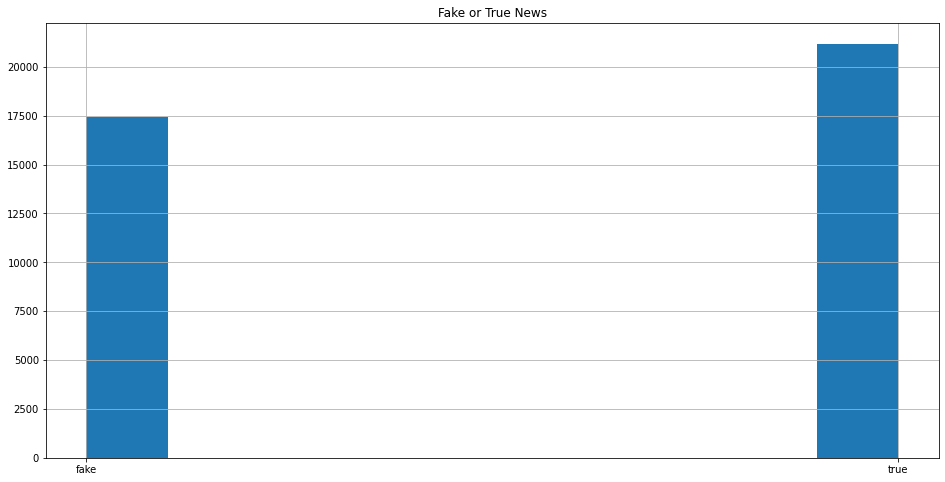

In [ ]:
plt.figure(figsize=(16,8))
df_clean.label.hist()
plt.title('Fake or True News')
plt.show()

The data has become slightly unbalanced after cleaning. However, it is not substantial enough to significantly affect models.

### Distribution of news over a time period

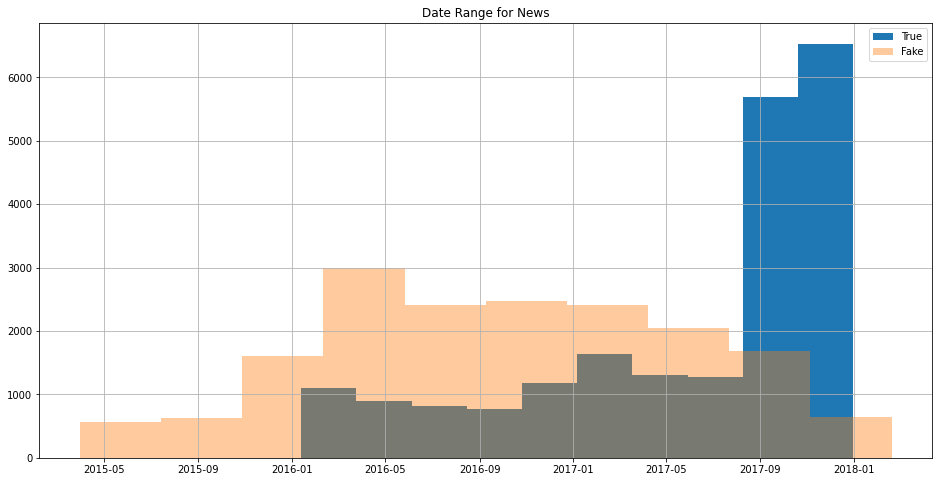

In [ ]:
show_hist_for_col(df_clean, 'date', 'Date Range for News')

For Fake vs. True, there is a more equal distribution of news over the time period. The fact that the dataset's "news" does not consistently cover the same events may cause classification models to choke a bit or overfit to the dataset.

### Length of titles

In [ ]:
df_clean['title_len'] = df_clean.title.apply(len)

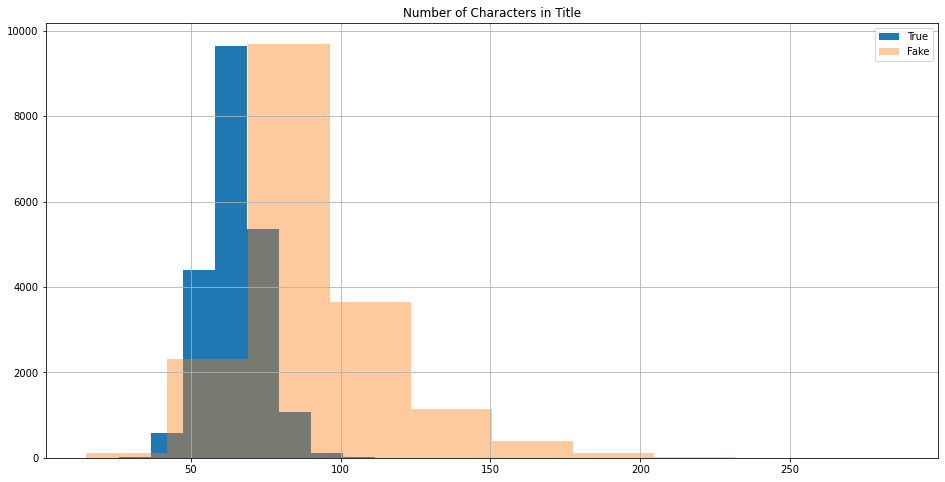

In [ ]:
show_hist_for_col(df_clean, 'title_len', 'Number of Characters in Title')

In [ ]:
df_clean[df_clean.label == 'true'].title_len.describe()

count    21191.000000
mean        64.660233
std          9.159722
min         26.000000
25%         59.000000
50%         64.000000
75%         70.000000
max        133.000000
Name: title_len, dtype: float64

In [ ]:
df_clean[df_clean.label == 'fake'].title_len.describe()

count    17447.000000
mean        91.217000
std         24.505484
min         15.000000
25%         77.000000
50%         88.000000
75%        100.000000
max        286.000000
Name: title_len, dtype: float64

Fake news stories have a wider range in the length of title than true, and those fake news titles have a higher median & mean than true ones.

The title length of fake news stories ranges more widely than that of true stories, and the median and mean of those fake news titles are higher than those of true stories.

As in the case here, in terms of length, the first quartile of fake news is longer than the third quartile of true news. Simply categorizing the news by title length would produce better classification outcomes than randomization.

### Length of text

In [ ]:
df_clean['text_len'] = df_clean.text.apply(len)

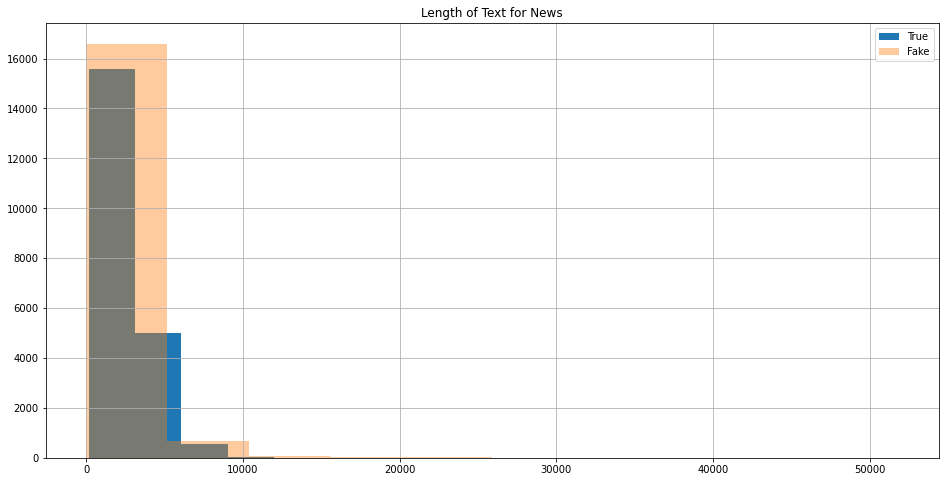

In [ ]:
show_hist_for_col(df_clean, 'text_len', 'Length of Text for News')

There are some news articles that are rather lengthy (over 10,000 characters). We ought to investigate what they're about.

In [ ]:
df_long = df_clean[df_clean.text_len > 10000]

In [ ]:
df_long

,title,text,subject,date,label,title_len,text_len
2639,Trump’s List Of ‘Unreported Terror Attacks’ A...,"In another of Donald Trump s whine rests, the ...",News,2017-02-07,fake,90,13095
4147,Here’s The Master List Of Reasons Why Trump W...,We know Trump is a sexual predator. We know he...,News,2016-10-18,fake,90,15211
4475,Here You Go: Every Bat Sh*t Crazy Thing That ...,Donald Trump spent Monday night making a total...,News,2016-09-27,fake,91,20264
7715,Fed Up Republicans Threaten Third Party Optio...,I ve been saying for a long time now that the ...,News,2016-03-03,fake,71,26734
8111,The Top Ten Reasons We NEED A Liberal Supreme...,"One way or another, the passing of Supreme Cou...",News,2016-02-14,fake,52,10120
...,...,...,...,...,...,...,...
28649,President Obama's final State of the Union add...,(Reuters) - President Barack Obama knocked Rep...,politicsNews,2016-01-13,true,50,15363
30759,The thinking behind Kim Jong Un's 'madness',SEOUL (Reuters) - On an icy December day in 20...,worldnews,2017-11-30,true,43,11405
31043,Special Report: 'Treacherous shenanigans' - Th...,HARARE (Reuters) - Inside State House in Harar...,worldnews,2017-11-26,true,81,14775
32027,Special Report: How a defrocked judge became t...,"CARACAS (Reuters) - Last March, Chief Justice ...",worldnews,2017-11-15,true,92,17999


Checking the longest news story

In [ ]:
df_long[df_long.text_len == df_long.text_len.max()]

,title,text,subject,date,label,title_len,text_len
17053,MEDIA TRIPWIRE? Ping Pong Pizza Conspiracy Pro...,Funny how secrets travel. I d start to believ...,US_News,2016-12-28,fake,98,51794


In [ ]:
longest_text = df_long[df_long.text_len == df_long.text_len.max()]['text'].iloc[0]

In [ ]:
longest_text

' Funny how secrets travel. I d start to believe, if I were to bleed.    Lyrics written by David Bowie from the album OutsideShawn Helton 21st Century Wire In the days before the US presidential election in November 2016, Wikileaks revealed a new string of emails connected to Hillary Clinton s 2016 campaign chairman, John Podesta. Online interpretations of the leaked Podesta email exchanges subsequently led to a digital firestorm on social media, producing an intense conspiratorial  open source investigation  still in search of its smoking gun. However, the phenomenon now known by its hashtag #Pizzagate has since set a number of tertiary events into motion. Is there a real story hidden amongst the debris of this online explosion?Is it possible that  open source investigators  were being led into a virtual cul-de-sac and thus missing the real story?More importantly, could people be playing into the hands of the very establishment they seek to depose?Let s investigate   SHOCK & AWE    Ov

It looks like an actual news story and not invalid data. We can safely presume that they are acceptable for inclusion in the dataset.

In [ ]:
df_clean[df_clean.label == 'true'].text_len.describe()

count    21191.000000
mean      2378.527158
std       1683.781664
min        152.000000
25%        906.500000
50%       2216.000000
75%       3226.500000
max      29781.000000
Name: text_len, dtype: float64

In [ ]:
df_clean[df_clean.label == 'fake'].text_len.describe()

count    17447.000000
mean      2550.912936
std       2201.223680
min          5.000000
25%       1650.000000
50%       2235.000000
75%       3006.000000
max      51794.000000
Name: text_len, dtype: float64

There's a news story that's only 5 characters long. Let's see what it is about.

In [ ]:
df_clean[df_clean.text_len == df_clean.text_len.min()]

,title,text,subject,date,label,title_len,text_len
12095,DEAR DEMOCRATS AND LIBERALS…Stop Complaining A...,Ouch!,politics,2016-11-21,fake,96,5


It's just one word, but it should be kept.

When comparing the 2nd and 3rd quartile values, the majority of fake and true news stories are roughly the same length, while the fake news stories have a higher maximum and noticeably higher 1st quartile value.

### Capitalization in the title

In [ ]:
df_clean['caps_in_title'] = df_clean['title'].apply(lambda title: sum(1 for char in title if char.isupper()))

In [ ]:
df_clean

,title,text,subject,date,label,title_len,text_len,caps_in_title
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,fake,79,2893,11
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,fake,69,1898,8
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,fake,90,3597,15
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,fake,78,2774,19
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,fake,70,2346,11
...,...,...,...,...,...,...,...,...
38639,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,true,61,2821,8
38640,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,true,52,800,3
38641,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,true,49,1950,1
38642,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,true,61,1199,4


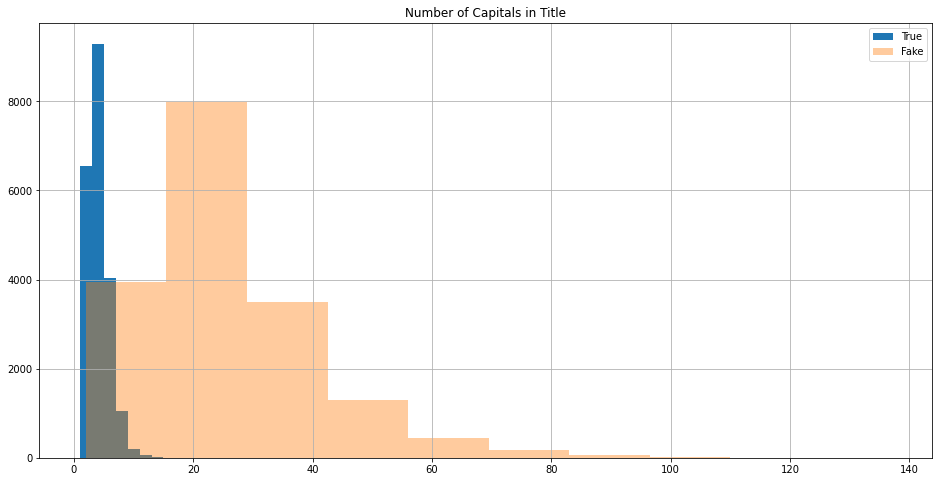

In [ ]:
show_hist_for_col(df_clean, 'caps_in_title', 'Number of Capitals in Title')

In [ ]:
df_clean[df_clean.label == 'true'].caps_in_title.describe()

count    21191.000000
mean         3.546128
std          1.783526
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: caps_in_title, dtype: float64

In [ ]:
df_clean[df_clean.label == 'fake'].caps_in_title.describe()

count    17447.000000
mean        25.689689
std         13.982261
min          2.000000
25%         16.000000
50%         22.000000
75%         32.000000
max        137.000000
Name: caps_in_title, dtype: float64

Fake news uses a lot more capitalization than the true news does. Longer titles were more common in instances of fake news, so perhaps that explains some of it. To be certain, we should normalize the counts and run another test.

In [ ]:
df_clean['norm_caps_in_title'] = df_clean['caps_in_title'] / df_clean['title_len']

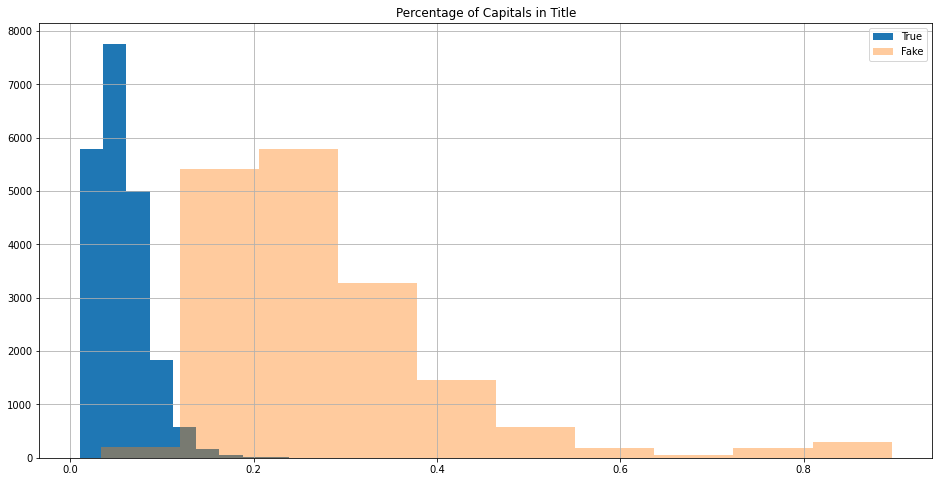

In [ ]:
show_hist_for_col(df_clean, 'norm_caps_in_title', 'Percentage of Capitals in Title')

In [ ]:
df_clean[df_clean.label == 'true'].norm_caps_in_title.describe()

count    21191.000000
mean         0.055279
std          0.027712
min          0.010526
25%          0.034483
50%          0.050847
75%          0.070175
max          0.264151
Name: norm_caps_in_title, dtype: float64

In [ ]:
df_clean[df_clean.label == 'fake'].norm_caps_in_title.describe()

count    17447.000000
mean         0.280398
std          0.134694
min          0.033708
25%          0.191781
50%          0.246914
75%          0.330357
max          0.895833
Name: norm_caps_in_title, dtype: float64

There is even less overlap when considering the percentage of capitals in the news title for Fake news compared to True.  

Just looking at this metric would give considerably better results for classification than random guessing, and is a good candidate for a baseline model.  This type of basic classification model while having the potential to perform very well on this dataset could easily be thwarted if it was used as a filter because the *Fake News* creators could adopt more standard capitalization standards.

## Capitals in text

In [ ]:
df_clean['caps_in_text'] = df_clean['text'].apply(lambda text: sum(1 for char in text if char.isupper()))

In [ ]:
df_clean['norm_caps_in_text'] = df_clean['caps_in_text'] / df_clean['text_len']

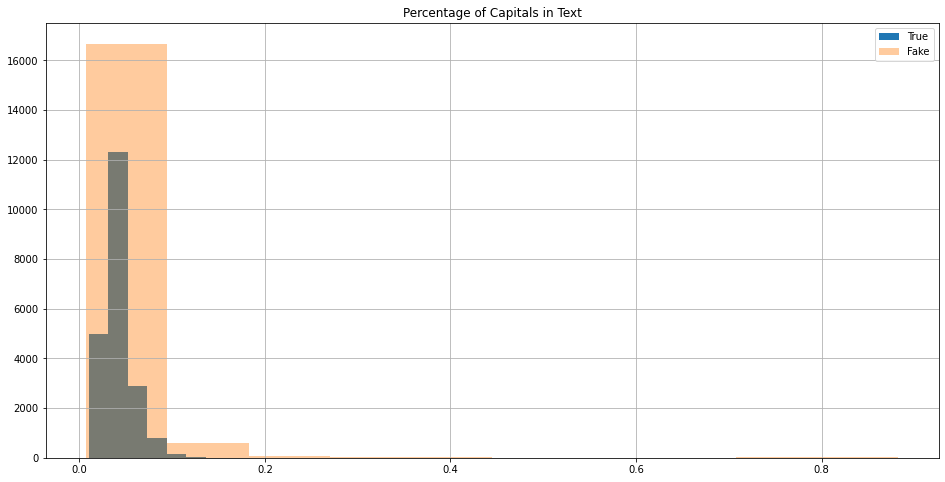

In [ ]:
show_hist_for_col(df_clean, 'norm_caps_in_text', 'Percentage of Capitals in Text')

In [ ]:
df_clean[df_clean.label == 'true'].norm_caps_in_text.describe()

count    21191.000000
mean         0.041764
std          0.015244
min          0.010239
25%          0.031744
50%          0.038193
75%          0.047673
max          0.220690
Name: norm_caps_in_text, dtype: float64

In [ ]:
df_clean[df_clean.label == 'fake'].norm_caps_in_text.describe()

count    17447.000000
mean         0.045016
std          0.044842
min          0.007538
25%          0.029395
50%          0.036131
75%          0.047068
max          0.882353
Name: norm_caps_in_text, dtype: float64

As opposed to the title, there is a great deal of overlap for the percentage of capitals in the text of Fake vs. True news.

## News organizations mentioned in text

### Reuters

As per dataset, all the *True* news stories are from Reuters, but we need to check how many of those stories as well as the ones labeled *Fake* contain the string *Reuters*.

In [ ]:
def check_string_for(substring, fullstring):
    """Check if the substring is in the fullstring"""
    if search(substring, fullstring):
        return True
    else:
        return False

In [ ]:
df_reuters = df_clean[df_clean.text.apply(lambda news_text: check_string_for('Reuters', news_text))]

In [ ]:
df_reuters.label.value_counts()

true    21154
fake      215
Name: label, dtype: int64

In [ ]:
df_reuters.iloc[0]['text']

'Republicans should be downright afraid to try killing Obamacare ever again.As we all know, Donald Trump has been urging Republicans in Congress to pass legislation that would strip healthcare from over 20 million Americans.Not only do Trump and his Republican allies want to kill Obamacare, they want to end Medicaid as we know it. Indeed, Medicaid would become a death panel where the state would decide what kind of healthcare people get.As Trump s effort to kill Obamacare gets more desperate, the landmark healthcare program gets more popular, enough so, that a few Republicans have broken ranks to oppose repeal.In fact, Medicaid expansion is so popular that Maine voters overruled Governor Paul LePage s veto on Tuesday via the ballot.According to Reuters,Tuesday s ballot asked Maine voters to approve or reject a plan to provide healthcare coverageunder Medicaid for adults under the age of 65 with incomes at or below 138 percent of the federal poverty level, which in 2017 is about $16,000

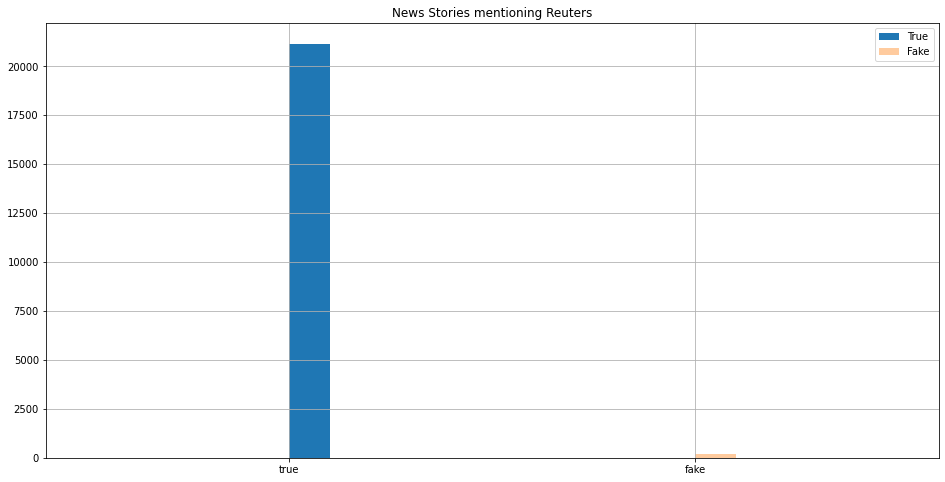

In [ ]:
show_hist_for_col(df_reuters, 'label', "News Stories mentioning Reuters")

We only checked for *Reuters* with a capital R.  Most but not all of the *True* stories include that string, plus 215 of the *Fake* stories reference it.

Since the *True* stories we've inspected all contain the text *(Reuters)* and the dataset creators say they collected all the *True* data from Reuters, We should likely check to see what the text for the *True* stories is like when they don't contain that text.

In [ ]:
df_clean_true = df_clean[df_clean.label == 'true']
df_true_not_reuters_paren = df_clean_true[df_clean_true.text.apply(lambda news_text: not check_string_for('(Reuters)', news_text))]

In [ ]:
df_true_not_reuters_paren

,title,text,subject,date,label,title_len,text_len,caps_in_title,norm_caps_in_title,caps_in_text,norm_caps_in_text
17556,Democratic U.S. senator seeks audit of EPA chi...,WASHINGTON () - The top Democrat on the Senate...,politicsNews,2017-12-18,true,66,2029,7,0.106061,113,0.055692
17878,Factbox: Republicans to watch in U.S. Senate t...,WASHINGTON - Some key U.S. senators still had ...,politicsNews,2017-11-30,true,59,3993,5,0.084746,91,0.022790
18587,GAO opens door for Congress to review leverage...,NEW YORK (IFR) - The investigative arm of Cong...,politicsNews,2017-10-19,true,55,1798,4,0.072727,63,0.035039
20925,White House unveils list of ex-lobbyists grant...,The White House on Wednesday disclosed a group...,politicsNews,2017-06-01,true,63,3369,2,0.031746,111,0.032947
21784,Factbox: Trump Supreme Court appointee to affe...,"Neil Gorsuch, President Donald Trump’s appoint...",politicsNews,2017-04-07,true,62,2706,4,0.064516,86,0.031781
22778,Trump's defense chief visits UAE in first Midd...,ABU DHABI - U.S. President Donald Trump’s defe...,politicsNews,2017-02-18,true,58,1363,6,0.103448,87,0.063830
23197,Trump Supreme Court nominee Gorsuch seen in th...,"Federal appeals court judge Neil Gorsuch, the ...",politicsNews,2017-02-01,true,62,5869,5,0.080645,204,0.034759
23234,Kushner divests equity in major NYC property,NEW YORK (IFR) - Jared Kushner has divested hi...,politicsNews,2017-01-31,true,44,1999,4,0.090909,84,0.042021
24236,Commentary: Trump can't fight Islamic State wi...,Over the course of the U.S. presidential campa...,politicsNews,2016-12-07,true,75,6880,5,0.066667,294,0.042733
24774,Tough reality check for Trump's pledge of bett...,"CHARLOTTE, North Carolina - Donald Trump’s pro...",politicsNews,2016-11-10,true,70,4741,2,0.028571,99,0.020882


Interestingly there are a couple stories with the *True* label that are from **IFR** even though the dataset creators said all the *True* stories are from **Reuters**.  The stories without a news source look to follow the standard format of a **Reuters** news story.

## via and image via

When training a word vector model, "via" was a highly important feature.  We can check for it's distribution.

In [ ]:
df_via = df_clean[df_clean.text.apply(lambda news_text: check_string_for(' via', news_text))]

In [ ]:
df_via

,title,text,subject,date,label,title_len,text_len,caps_in_title,norm_caps_in_title,caps_in_text,norm_caps_in_text
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,2017-12-25,fake,82,1741,24,0.292683,54,0.031017
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,2017-12-23,fake,87,2224,22,0.252874,63,0.028327
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,2017-12-22,fake,102,2772,23,0.225490,121,0.043651
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,2017-12-21,fake,81,1644,20,0.246914,54,0.032847
10,"Papa John’s Founder Retires, Figures Out Raci...","A centerpiece of Donald Trump s campaign, and ...",News,2017-12-21,fake,68,2003,11,0.161765,75,0.037444
...,...,...,...,...,...,...,...,...,...,...,...
38420,Top Indian court to hear Rohingya deportation ...,NEW DELHI (Reuters) - India s top court has ag...,worldnews,2017-09-01,true,72,2704,4,0.055556,90,0.033284
38511,TPP countries consider amendments to stalled t...,SYDNEY (Reuters) - The 11 countries committed ...,worldnews,2017-08-29,true,64,2914,3,0.046875,100,0.034317
38574,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,2017-08-25,true,54,3649,4,0.074074,95,0.026035
38581,Thai immigration police chief says no informat...,BANGKOK (Reuters) - The head of Thailand s imm...,worldnews,2017-08-25,true,75,960,2,0.026667,36,0.037500


In [ ]:
df_via['label'].value_counts()

fake    7626
true     580
Name: label, dtype: int64

"via" seems to be highly indicative of a fake news story. Let's take a look at an example.

In [ ]:
df_via.iloc[1000].text

'Lawyers, especially on Twitter, like giving their own legal opinions on things to their followers. Some of them will try and explain legal matters happening in the nation s capital, and they don t always agree, but they always have insight for us laypeople. Seth Abramson, one such lawyer, has been tweeting threads explaining some of what s happening, and he just posted one that s pretty damning for the GOP.The GOP is calling Comey s testimony a win for Trump. The fact that they would be so obviously false is just amazing, and not in an  I didn t expect this,  way. Abramson calls them out on that by rehashing Comey s testimony in a series of 21 tweets. Two particular tweets allude to the GOP s, and Trump s, insistence that Comey proved Trump was not under investigation today:(3) The President of the United States IS under criminal investigation for felony Obstruction of Justice by Special Counsel Bill Mueller.  Seth Abramson (@SethAbramson) June 8, 2017(4) Comey told Trump he WASN T un

This one has "image via" at the end of the story.  Next, we'll check for that set of words.

In [ ]:
df_image_via = df_clean[df_clean.text.apply(lambda news_text: check_string_for('image via', news_text))]

In [ ]:
df_image_via

,title,text,subject,date,label,title_len,text_len,caps_in_title,norm_caps_in_title,caps_in_text,norm_caps_in_text
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,2017-12-25,fake,82,1741,24,0.292683,54,0.031017
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,2017-12-23,fake,87,2224,22,0.252874,63,0.028327
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,2017-12-22,fake,102,2772,23,0.225490,121,0.043651
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,2017-12-21,fake,81,1644,20,0.246914,54,0.032847
10,"Papa John’s Founder Retires, Figures Out Raci...","A centerpiece of Donald Trump s campaign, and ...",News,2017-12-21,fake,68,2003,11,0.161765,75,0.037444
...,...,...,...,...,...,...,...,...,...,...,...
9044,FL ‘Responsible Gun Owners’ Shoot 9-Year-Old ...,A bunch of the NRA s responsible gun owners ...,News,2016-01-01,fake,98,1920,19,0.193878,45,0.023438
9045,Judge Serves A Crushing Blow To The Florida G...,A Leon Circuit Judge in Florida has adopted a ...,News,2016-01-01,fake,84,3120,17,0.202381,69,0.022115
9046,Bill Cosby Thanks ‘Friends And Fans’ In New Y...,Bill Cosby was America s favorite dad for a lo...,News,2016-01-01,fake,91,2827,29,0.318681,91,0.032190
9047,Obama Announces ‘Unfinished Business’ For 201...,President Obama began the new year of 2016 wit...,News,2016-01-01,fake,82,2153,16,0.195122,53,0.024617


In [ ]:
df_image_via['label'].value_counts()

fake    6061
Name: label, dtype: int64

With all the posts with 'image via' being fake, it's highly indicative of that label, but this may be particular to this dataset and may not generalize.

## said

In [ ]:
df_said = df_clean[df_clean.text.apply(lambda news_text: check_string_for('said', news_text))]

In [ ]:
df_said

,title,text,subject,date,label,title_len,text_len,caps_in_title,norm_caps_in_title,caps_in_text,norm_caps_in_text
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,fake,69,1898,8,0.115942,88,0.046365
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,fake,70,2346,11,0.157143,63,0.026854
12,Bad News For Trump — Mitch McConnell Says No ...,Republicans have had seven years to come up wi...,News,2017-12-21,fake,76,2252,13,0.171053,99,0.043961
13,WATCH: Lindsey Graham Trashes Media For Portr...,The media has been talking all day about Trump...,News,2017-12-20,fake,91,1579,18,0.197802,54,0.034199
15,Tone Deaf Trump: Congrats Rep. Scalise On Los...,Donald Trump just signed the GOP tax scam into...,News,2017-12-20,fake,78,2103,13,0.166667,71,0.033761
...,...,...,...,...,...,...,...,...,...,...,...
38639,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,true,61,2821,8,0.131148,116,0.041120
38640,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,true,52,800,3,0.057692,39,0.048750
38641,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,true,49,1950,1,0.020408,54,0.027692
38642,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,true,61,1199,4,0.065574,55,0.045872


In [ ]:
df_said.label.value_counts()

true    19855
fake     9849
Name: label, dtype: int64

The stories containing the word said are indicative of the news story being true.  With twice as many of the "true" news stories containing said vs. "fake", the true ones must seem likely to be more concerned with providing quotations, or at least quotations in this style.

## on

In [ ]:
df_on = df_clean[df_clean.text.apply(lambda news_text: check_string_for(' on ', news_text))]

In [ ]:
df_on

,title,text,subject,date,label,title_len,text_len,caps_in_title,norm_caps_in_title,caps_in_text,norm_caps_in_text
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,fake,69,1898,8,0.115942,88,0.046365
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,fake,90,3597,15,0.166667,308,0.085627
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,fake,78,2774,19,0.243590,123,0.044340
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,fake,70,2346,11,0.157143,63,0.026854
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,2017-12-25,fake,82,1741,24,0.292683,54,0.031017
...,...,...,...,...,...,...,...,...,...,...,...
38639,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,true,61,2821,8,0.131148,116,0.041120
38640,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,true,52,800,3,0.057692,39,0.048750
38641,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,true,49,1950,1,0.020408,54,0.027692
38642,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,true,61,1199,4,0.065574,55,0.045872


In [ ]:
df_on.label.value_counts()

true    20968
fake    15082
Name: label, dtype: int64

The use of 'on' is fairly balanced although somewhat indicative of a 'true' story.

## you

In [ ]:
df_you = df_clean[df_clean.text.apply(lambda news_text: check_string_for(' you ', news_text))]

In [ ]:
df_you

,title,text,subject,date,label,title_len,text_len,caps_in_title,norm_caps_in_title,caps_in_text,norm_caps_in_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,fake,79,2893,11,0.139241,138,0.047701
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,fake,90,3597,15,0.166667,308,0.085627
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,fake,78,2774,19,0.243590,123,0.044340
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,2017-12-25,fake,82,1741,24,0.292683,54,0.031017
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,2017-12-22,fake,102,2772,23,0.225490,121,0.043651
...,...,...,...,...,...,...,...,...,...,...,...
38576,Downfall of ex-Samsung strategy chief leaves '...,"SEOUL (Reuters) - Over four decades, Choi Gee-...",worldnews,2017-08-25,true,70,4581,2,0.028571,121,0.026413
38591,Defense Secretary Mattis promises support to U...,KIEV (Reuters) - U.S. Defense Secretary Jim Ma...,worldnews,2017-08-24,true,79,4200,4,0.050633,148,0.035238
38617,"Trump must be respected as U.S. president, say...",BERLIN (Reuters) - Chancellor Angela Merkel sa...,worldnews,2017-08-23,true,64,1544,5,0.078125,60,0.038860
38630,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,2017-08-22,true,72,5799,5,0.069444,235,0.040524


In [ ]:
df_you.label.value_counts()

fake    8558
true    2401
Name: label, dtype: int64

In [ ]:
df_you.iloc[10].text

'Senate Majority Whip John Cornyn (R-TX) thought it would be a good idea to attack Special Counsel Robert Mueller over the Russia probe. As Mueller s noose tightens, Republicans are losing their sh-t and attacking Mueller and the FBI in order to protect probably the most corrupt  president  ever.Former Attorney General Eric Holder tweeted on Friday,  Speaking on behalf of the vast majority of the American people, Republicans in Congress be forewarned: any attempt to remove Bob Mueller will not be tolerated. Cornyn retweeted Holder to say,  You don t. You don t https://t.co/7lHYkIloyz  Senator JohnCornyn (@JohnCornyn) December 16, 2017Bloomberg s Steven Dennis tweeted on Saturday that  [Cornyn] s beef is with Holder, not Mueller,  but Cornyn responded to say,  But Mueller needs to clean house of partisans. But Mueller needs to clean house of partisans https://t.co/g8SwgAKtfH  Senator JohnCornyn (@JohnCornyn) December 16, 2017The Washington Post s Greg Sargent asked Cornyn,  Will you acc

Although only in about half of the fake news stories, it seems highly indicative of a fake news story because of the comparatively few true news stories that have the word 'you'.

# **Saving the cleaned dataset**

In [ ]:
if SAVE_FILE:
    df_clean.to_csv(DATA_PATH + CLEAN_DATA_FILE_NAME, index=False)